In [10]:
import pandas as pd
import re

In [11]:
trials = pd.read_csv(
    "coronavirus_clinical_trials.csv"
)

trials.head()

,Unnamed: 0,status,phase,sex,age,nct number,inclusion,exclusion,enrollment
0,0,"Active, not recruiting",Not Applicable,All,"18 Years and older (Adult, Older Adult)",NCT04321421,death [ Time Frame: within 7 days ]death from ...,time to extubation [ Time Frame: within 7 days...,49.0
1,1,Not yet recruiting,Phase 2\nPhase 3,All,"18 Years to 75 Years (Adult, Older Adult)",NCT04291053,Mortality rate [ Time Frame: up to 28 days ]Al...,Clinical status assessed according to the offi...,550.0
2,2,Recruiting,Not Applicable,All,"18 Years to 70 Years (Adult, Older Adult)",NCT04324489,Improved clinical status [ Time Frame: Day 14 ...,SARS-CoV-2 RNA [ Time Frame: 28 days ]time to ...,4.0
3,3,Not yet recruiting,Phase 4,All,"18 Years to 65 Years (Adult, Older Adult)",NCT04323228,Change from baseline score of Nutrition risk s...,Change from baseline Weight at end of the tria...,30.0
4,4,Withdrawn,Not Applicable,All,"18 Years to 80 Years (Adult, Older Adult)",NCT04287686,Time course of body temperature (fever) [ Time...,P/F ratio over time [ Time Frame: 14 days ]PaO...,0.0


In [7]:
trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   status      202 non-null    object 
 2   phase       131 non-null    object 
 3   sex         202 non-null    object 
 4   age         202 non-null    object 
 5   nct number  202 non-null    object 
 6   inclusion   202 non-null    object 
 7   exclusion   202 non-null    object 
 8   enrollment  199 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.3+ KB


In [9]:
print(trials.columns.tolist())

['Unnamed: 0', 'status', 'phase', 'sex', 'age', 'nct number', 'inclusion', 'exclusion', 'enrollment']


In [12]:
# Drop index column
trials = trials.drop(columns=["Unnamed: 0"])

In [13]:
# Normalize sex
trials["sex"] = trials["sex"].str.lower().fillna("all")

In [14]:
# Parse minimum age
def parse_min_age(age_text):
    if pd.isna(age_text):
        return 0
    match = re.search(r"\d+", age_text)
    return int(match.group()) if match else 0

trials["min_age"] = trials["age"].apply(parse_min_age)
trials["max_age"] = 120

In [15]:
# Clean eligibility text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\n|\r", " ", text)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.strip()

trials["inclusion_clean"] = trials["inclusion"].apply(clean_text)
trials["exclusion_clean"] = trials["exclusion"].apply(clean_text)

In [17]:
# Check unrealistic ages
trials[(trials["min_age"] < 0) | (trials["min_age"] > 120)]

,status,phase,sex,age,nct number,inclusion,exclusion,enrollment,min_age,max_age,inclusion_clean,exclusion_clean


In [18]:
trials["enrollment"].describe()

count    1.990000e+02
mean     1.031514e+04
std      9.497908e+04
min      0.000000e+00
25%      5.700000e+01
50%      2.000000e+02
75%      5.050000e+02
max      1.302508e+06
Name: enrollment, dtype: float64

In [19]:
trials["inclusion_clean"].str.len().describe()
trials["exclusion_clean"].str.len().describe()

count       202.000000
mean       3691.777228
std       10635.605161
min          24.000000
25%         210.500000
50%         872.000000
75%        2779.000000
max      121604.000000
Name: exclusion_clean, dtype: float64

In [20]:
trials = trials[trials["inclusion_clean"].str.len() > 20]

In [21]:
trials.head()

,status,phase,sex,age,nct number,inclusion,exclusion,enrollment,min_age,max_age,inclusion_clean,exclusion_clean
0,"Active, not recruiting",Not Applicable,all,"18 Years and older (Adult, Older Adult)",NCT04321421,death [ Time Frame: within 7 days ]death from ...,time to extubation [ Time Frame: within 7 days...,49.0,18,120,death time frame within 7 days death from any...,time to extubation time frame within 7 days d...
1,Not yet recruiting,Phase 2\nPhase 3,all,"18 Years to 75 Years (Adult, Older Adult)",NCT04291053,Mortality rate [ Time Frame: up to 28 days ]Al...,Clinical status assessed according to the offi...,550.0,18,120,mortality rate time frame up to 28 days all c...,clinical status assessed according to the offi...
2,Recruiting,Not Applicable,all,"18 Years to 70 Years (Adult, Older Adult)",NCT04324489,Improved clinical status [ Time Frame: Day 14 ...,SARS-CoV-2 RNA [ Time Frame: 28 days ]time to ...,4.0,18,120,improved clinical status time frame day 14 pe...,sarscov2 rna time frame 28 days time to sarsc...
3,Not yet recruiting,Phase 4,all,"18 Years to 65 Years (Adult, Older Adult)",NCT04323228,Change from baseline score of Nutrition risk s...,Change from baseline Weight at end of the tria...,30.0,18,120,change from baseline score of nutrition risk s...,change from baseline weight at end of the tria...
4,Withdrawn,Not Applicable,all,"18 Years to 80 Years (Adult, Older Adult)",NCT04287686,Time course of body temperature (fever) [ Time...,P/F ratio over time [ Time Frame: 14 days ]PaO...,0.0,18,120,time course of body temperature fever time fr...,pf ratio over time time frame 14 days pao2fio...


In [22]:
trials.shape

(201, 12)

<Axes: xlabel='status'>

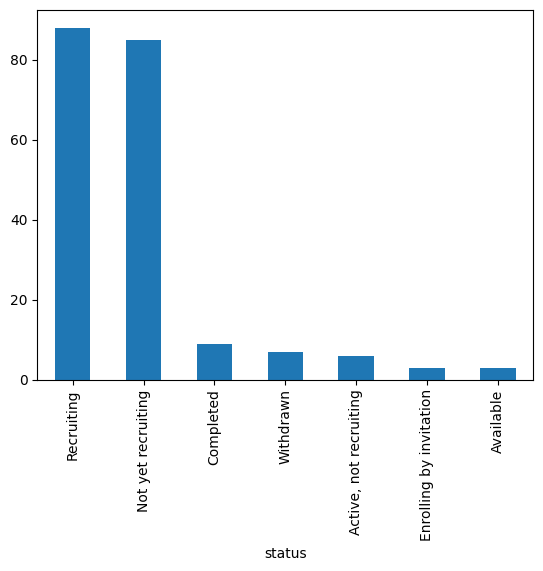

In [23]:
trials["status"].value_counts().plot(kind="bar")

<Axes: xlabel='phase'>

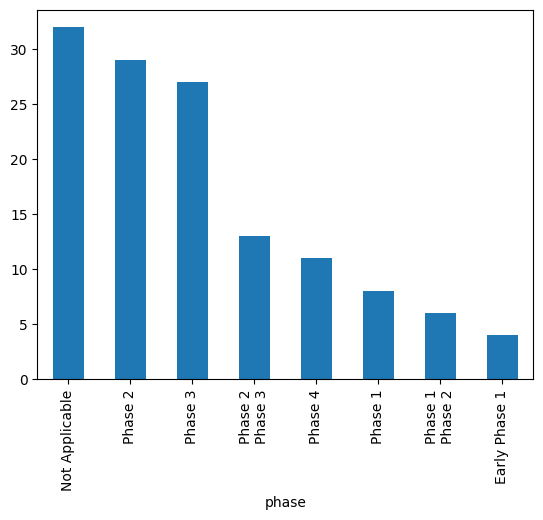

In [24]:
trials["phase"].value_counts().plot(kind="bar")

Early-phase vs late-phase trials. Explains recommendation prioritization (Phase 2 preferred)

<Axes: xlabel='sex'>

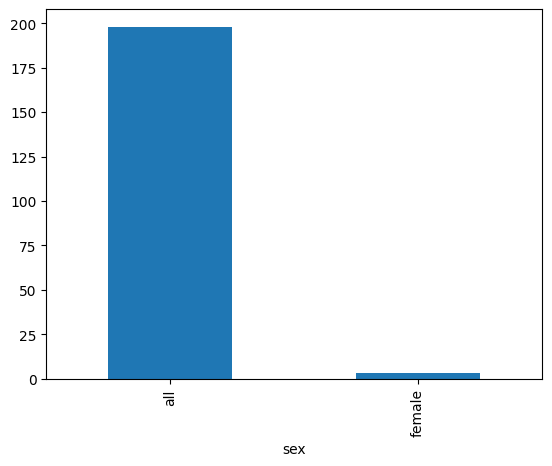

In [25]:
trials["sex"].value_counts().plot(kind="bar")

In [26]:
trials["min_age"].describe()

count    201.000000
mean      15.791045
std        9.997306
min        0.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       85.000000
Name: min_age, dtype: float64

<Axes: ylabel='Frequency'>

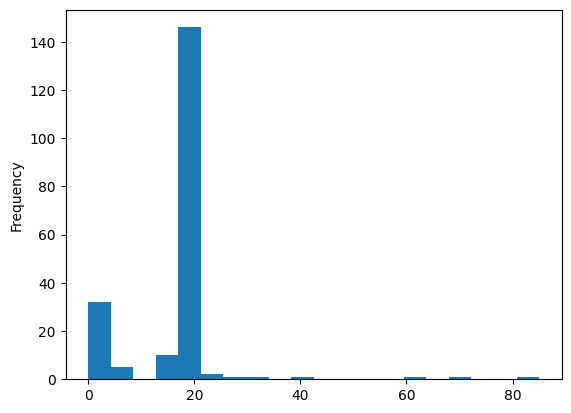

In [27]:
trials["min_age"].plot(kind="hist", bins=20)

In [28]:
trials["enrollment"].describe()

count    1.980000e+02
mean     1.036107e+04
std      9.521763e+04
min      0.000000e+00
25%      5.550000e+01
50%      2.000000e+02
75%      5.000000e+02
max      1.302508e+06
Name: enrollment, dtype: float64

<Axes: ylabel='Frequency'>

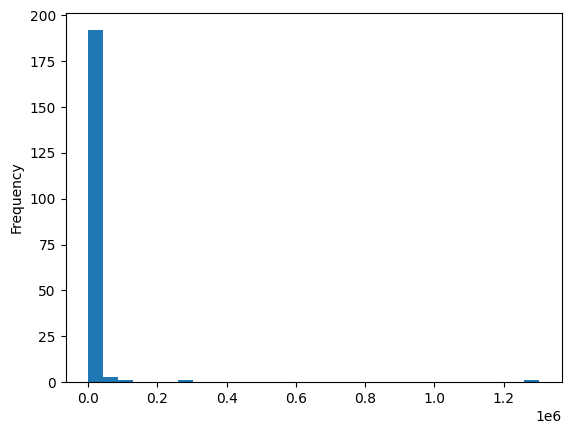

In [29]:
trials["enrollment"].plot(kind="hist", bins=30)

## Inclusion Criteria Length

In [30]:
trials["inclusion_clean"].str.split().apply(len).describe()

count     201.000000
mean       82.164179
std       162.768049
min         3.000000
25%        19.000000
50%        40.000000
75%        91.000000
max      1803.000000
Name: inclusion_clean, dtype: float64

<Axes: ylabel='Frequency'>

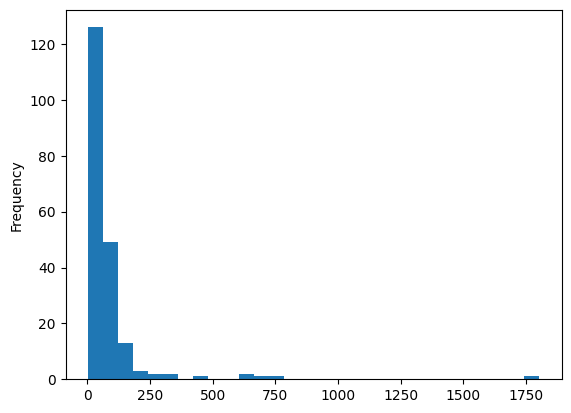

In [31]:
trials["inclusion_clean"].str.split().apply(len).plot(kind="hist", bins=30)

## Exclusion Criteria Length

In [32]:
trials["exclusion_clean"].str.split().apply(len).describe()

count      201.000000
mean       595.159204
std       1711.510255
min          3.000000
25%         33.000000
50%        136.000000
75%        447.000000
max      18945.000000
Name: exclusion_clean, dtype: float64

<Axes: ylabel='Frequency'>

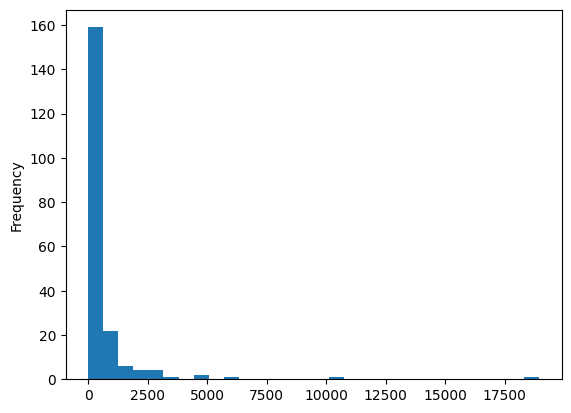

In [33]:
trials["exclusion_clean"].str.split().apply(len).plot(kind="hist", bins=30)

In [34]:
trials[
    (trials["inclusion_clean"].str.len() < 20) &
    (trials["exclusion_clean"].str.len() < 20)
].shape

(0, 12)

In [35]:
trials = trials[
    trials["inclusion_clean"].str.len() > 20
]